# Linear Discriminant Analysis 

Refer: [LDA in Python: Sebastian raschka blog](https://sebastianraschka.com/Articles/2014_python_lda.html)

In [370]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import load_iris

In [371]:
iris = load_iris()
X, y = iris.data, iris.target

In [372]:
# TODO: Vectorized splitting
def split(X, y):
    grps = np.unique(y)
    n = len(grps)
    arr = [0]*n
    for i, grp in enumerate(grps):
        arr[i] = X[y==grp, :]
        
    return arr

def within_class_scatter(X):
    n = X.shape[0]
    return np.cov(X.T)*(n-1)

def between_class_scatter(MU, N):
    n = MU.shape[0]
    return np.cov(MU.T)
    
    

In [373]:
LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [374]:
class LDA(BaseEstimator, ClassifierMixin):
    '''Linear Discriminant Analysis Classifier
    
    Parameters
    ----------
    
    n_components : int, optional (default=None)
        Number of components (<= min(n_classes - 1, n_features)) for
        dimensionality reduction. If None, will be set to
        min(n_classes - 1, n_features)        
        
    '''
    
    
    
    def __init__(self, n_components=None):
        self.n_components = n_components
        
    
    def fit(self, X, y):
        
        eig = np.linalg.eig
        inv = np.linalg.inv
        n_classes = len(np.unique(y))
        n_features = X.shape[1]
        
        if self.n_components is None:
            self.n_components = min(n_classes-1, n_features)
        
        # split
        spltd = split(X, y)
        # Computer Sw
        Sw = np.array([within_class_scatter(x) for x in spltd]).sum(0)     
        # Compute Means
        MU = np.array([x.mean(0) for x in spltd])
        # Computer Sb
        Sb = 0
        mu_ovr = MU.mean(0).reshape(-1, 1)
        for i in range(MU.shape[0]):
            mu = MU[i].reshape(-1, 1)
            n = spltd[i].shape[0]
            Sb += n*(mu-mu_ovr) @ (mu-mu_ovr).T
        
        
        self.within_class_scatter_ = Sw
        self.between_class_scatter_ = Sb
        
        self.eigvals_, self.discriminant_axes_ = eig(inv(Sw).dot(Sb))
        
        return self
        
        
    def transform(self, X, n_components=None):
        if n_components is None:
            n_components = self.n_components
            
        self.projection_matrix = self.discriminant_axes_[:, 0:n_components]
        
        return X @ self.projection_matrix

        
    

In [377]:
lda = LDA()
lda.fit(X, y)
X_trans = lda.transform(X)

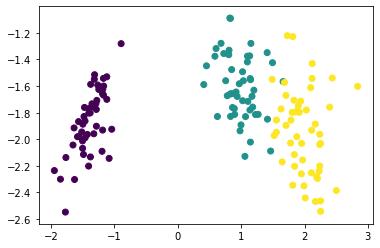

In [378]:
import matplotlib.pyplot as plt

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y)
plt.show()

In [379]:
lda_sk = LinearDiscriminantAnalysis()
X_trans_sk = LinearDiscriminantAnalysis().fit_transform(X, y)

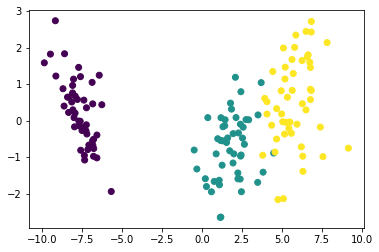

In [380]:
plt.scatter(X_trans_sk[:, 0], X_trans_sk[:, 1], c=y)
plt.show()